# Setup and Load data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from statistics import mode
from scipy.stats import ttest_ind as ttest
from scipy.stats import (gamma, norm, ranksums, kurtosis, skew)
from scipy.optimize import curve_fit
from tabulate import tabulate

In [4]:
def load_data():
    """Load .txt file with two columns delineated using white space"""
    data = []
    with open("Data_HW_2.txt") as f:
        for line in f.readlines():
            data.append([float(s) for s in line.split()])
    df = np.array(data).T  # inverse so faster indexing
    return (df[0,:], df[1,:])

x, y = load_data()

# Part 1

Here, I compute the t-statistic and p-value from a two-sides t-test, and I calculate the r-statistic and p-value from a Rank Sum test.

In [9]:
t, p_ttest = ttest(x,y, equal_var=False)
print("T-test:", " t-statistic = ", t, " p-value = ", p_ttest)
r, p_rank = ranksums(x,y)
print("Rank Sums:", " r-statistic = ", r, " p-value = ", p_rank)

T-test:  t-statistic =  -2.9940923277174787  p-value =  0.0028760521769851674
Rank Sums:  r-statistic =  1.8779687115387416  p-value =  0.06038544548253209


Here, I compute the 95% confidence intervals for a t-test! $\\ \\ $
$\bar{x_1} - \bar{x_2} \pm t \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }$ 
$ df = n_1 + n_2 - 1 $

In [15]:
# t-test confidence intervals
xmu, xstd = np.mean(x), np.std(x)
ymu, ystd = np.mean(y), np.std(y)
n1, n2 = x.shape[0], y.shape[0]
df = n1 + n2 - 1
t = 1.9623
mudiff = xmu - ymu
pooled_var = np.sqrt((n1*xstd**2 + n2*ystd**2)/(df))
ci = t*pooled_var*(np.sqrt(1/n1 + 1/n2))
# ci = t*np.sqrt(xstd**2/n1 + ystd**2/n2)

print("ttest 95% confidence interval: ", mudiff, f"+/- [{ci}]")
print("[", mudiff - ci, mudiff + ci, "]")

ttest 95% confidence interval:  -0.5990471999999993 +/- [0.39241335975937036]
[ -0.9914605597593698 -0.20663384024062897 ]


# Part 2

In [16]:
def plot_data():
    fig, (ax1, ax2) = plt.subplots(1, 2)

# Part a) calculate histograms
nbins = 30
xhist, xbins = np.histogram(x, bins=nbins)
yhist, ybins = np.histogram(y, bins=nbins)
xbin_centers = (xbins[1:] + xbins[:-1]) / 2 # not perfect because we don't know how data is distributed in bins
ybin_centers = (ybins[1:] + ybins[:-1]) / 2 # not perfect because we don't know how data is distributed in bins
xwidth = xbins[1]-xbins[0]
ywidth = ybins[1]-ybins[0]

# Part b) and c)
def gauss_func(x, A, B, C):
    return A*np.exp(-1*B*(x-C)**2)

def gamma_func(x, A, B, C):
    return C*x**(A-1)*np.exp(-x/B)

def plot_figure(centers, hist, width, title):
    """
    Centers: center of bins
    Hist: counter of each bin
    Width: width of bins (assumed uniform)
    Title: title of plot
    """
    # Plot Histogram
    plt.bar(centers, hist, alpha=.5, width=width, label=f"nbins={nbins}")

    # Plot Gaussian
    (a, b, c), _ = curve_fit(gauss_func, centers, hist)
    plt.plot(centers, gauss_func(centers, a, b, c), color="black", label="fit Gauss")

    # Plot Gamma
    (a, b, c), _ = curve_fit(gamma_func, centers, hist)
    plt.plot(centers, gamma_func(centers, a, b, c), color="red", label="fit Gamma")

    # Make it look pretty
    plt.legend()
    plt.title(title) 

/glade/scratch/zespinosa/ipykernel_8577/2800982741.py:15: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*(x-C)**2)


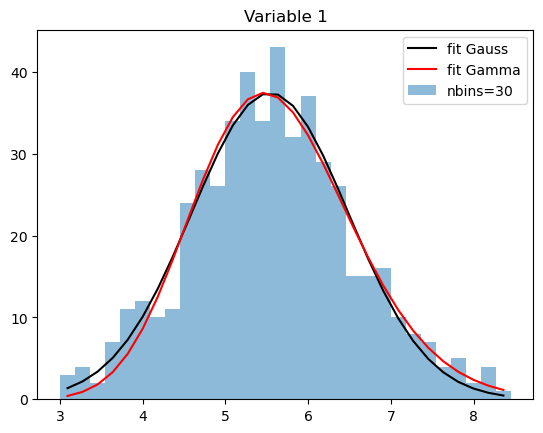

In [5]:
plot_figure(
    centers=xbin_centers,
    hist=xhist,
    width=xwidth,
    title="Variable 1"
)

/glade/scratch/zespinosa/ipykernel_8577/2800982741.py:15: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*(x-C)**2)
/glade/scratch/zespinosa/ipykernel_8577/2800982741.py:18: RuntimeWarning: overflow encountered in power
  return C*x**(A-1)*np.exp(-x/B)


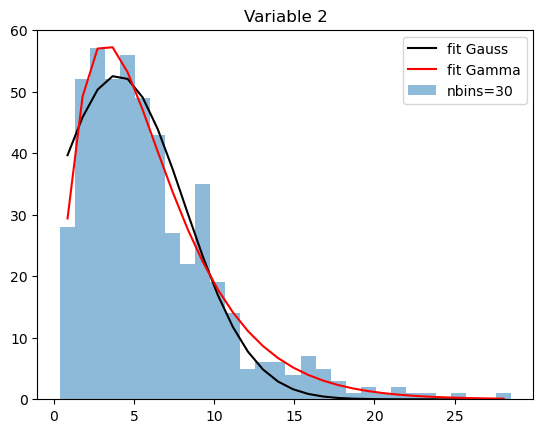

In [6]:
plot_figure(
    centers=ybin_centers,
    hist=yhist,
    width=ywidth,
    title="Variable 2"
)

In [7]:
# Part d) 
def tabulate_statistics(data, title):
    # mean, median, mode, standard deviation, skewness, and coefficient of kurtosis
    table = [
        ["Mean", np.mean(data)],
        ["Median", np.median(data)],
        ["Mode", mode(data)],
        ["Std", np.std(data)],
        ["Skew", skew(data)],
        ["Kurtosis", kurtosis(data, fisher=False)],
    ]
    print(title)
    print(tabulate(table))
    
tabulate_statistics(x, "Variable 1")
tabulate_statistics(y, "Variable 2")
    

Variable 1
--------  --------
Mean      5.56842
Median    5.5597
Mode      5.135
Std       1.0015
Skew      0.127142
Kurtosis  2.97864
--------  --------
Variable 2
--------  --------
Mean       6.16746
Median     5.1963
Mode      16.1466
Std        4.35572
Skew       1.52793
Kurtosis   6.1883
--------  --------


# Discussion
Using the t-test and Rank-sum test to calculate p-values, gives very different solutions. The t-test gives a p-value of .00288, whereas the Rank-sum test computes a p-value of .060. Using a 95% significance threshold, our conclusions from the Rank-sum and t-test appear to be contradictory. After examining the distributions in a bit more detail, and calculating summary statistical metrics for each distribution, we observe that Variable 2 does not follow a Gaussian distribution. It is much better fit by a Gamma distribution. The t-test assumes that the data follows a normal distribution. As a result, using a t-test for this analysis is inappropriate and the results should not be trusted. The Rank sum results suggest that the mean and medians of the two sample distributions are equal. This is a bit counter-intuitive given that upon inspecting the histograms, the distributions appear to be different.  